# Importing Necessary Libraries

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [440]:
df = pd.read_csv("personality_datasert.csv")

In [441]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Sanity Check of Data

In [442]:
df.shape

(2900, 8)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [444]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [445]:
df.describe(include="object")

,Stage_fear,Drained_after_socializing,Personality
count,2900,2900,2900
unique,2,2,2
top,No,No,Extrovert
freq,1490,1493,1491


In [446]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [447]:
df.duplicated().sum()

np.int64(402)

In [448]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

# Exploratory Data Analysis

In [449]:
df = df.drop_duplicates()

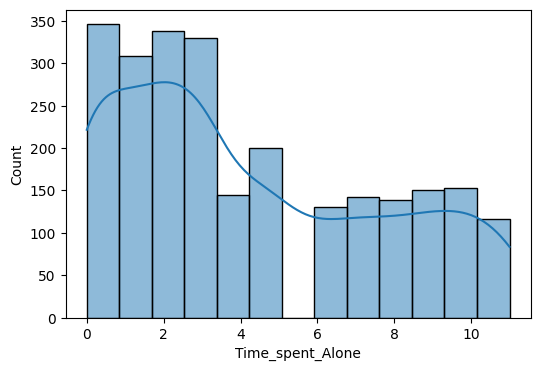

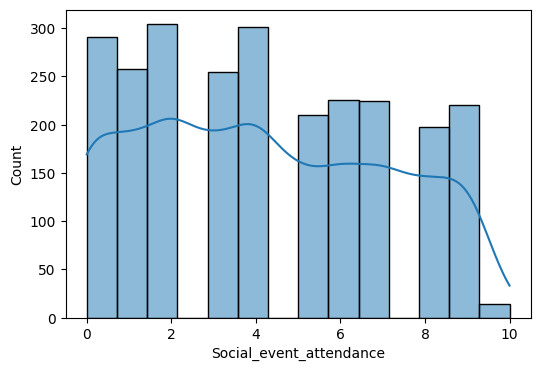

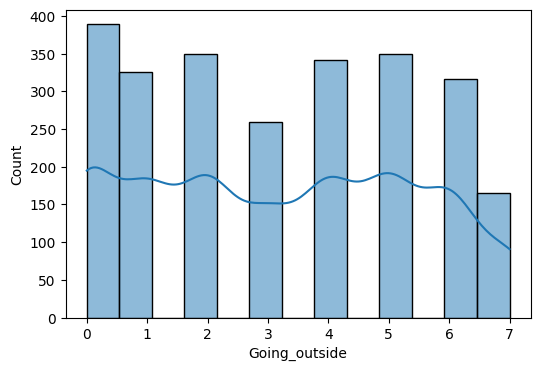

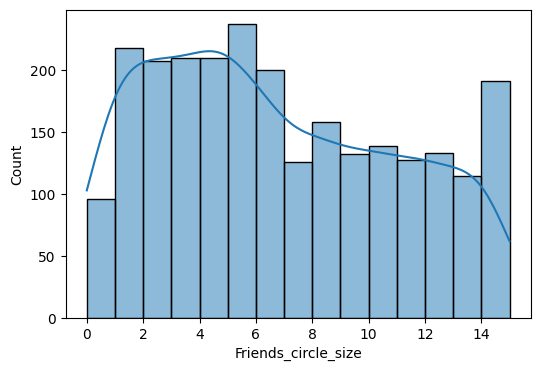

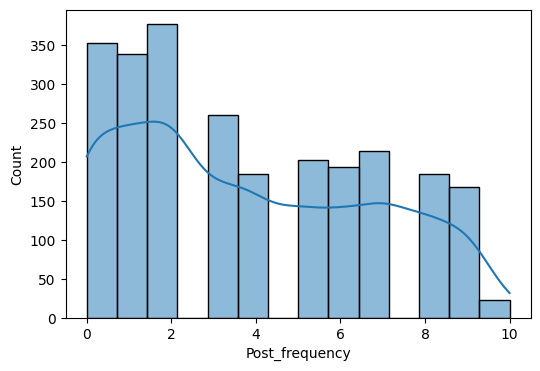

In [450]:
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance','Going_outside', 'Friends_circle_size','Post_frequency',]

for col in numeric_cols :
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col,kde=True)

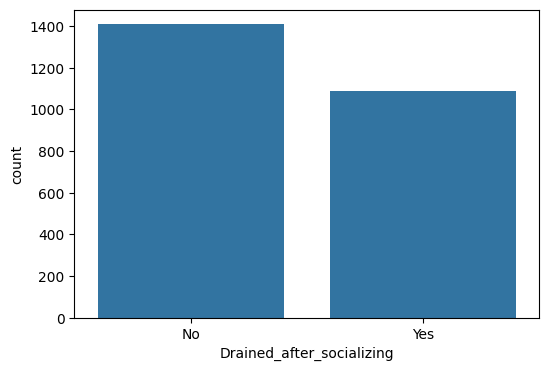

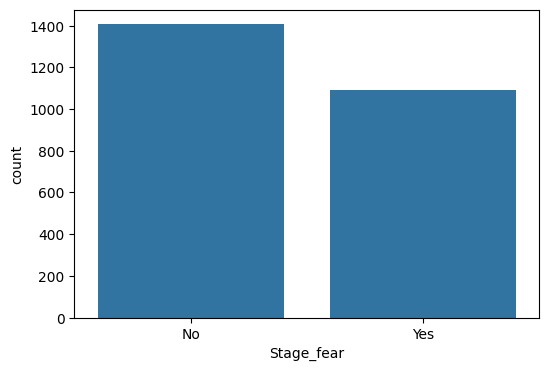

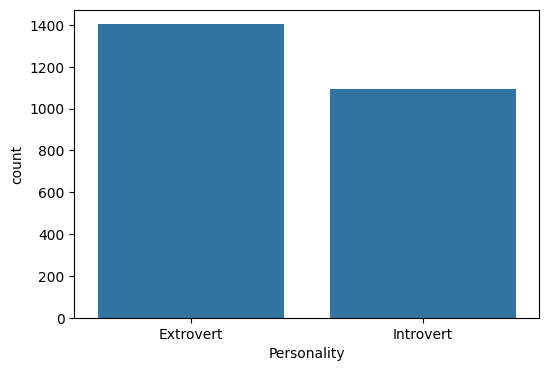

In [451]:
categorical_cols = ['Drained_after_socializing','Stage_fear','Personality']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)

In [452]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Personality"] = le.fit_transform(df["Personality"])


<Axes: >

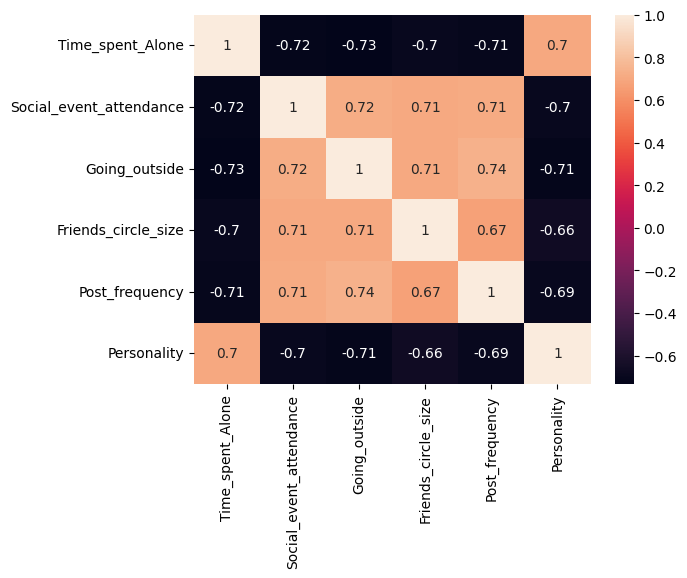

In [453]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Feature Engineering

In [454]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,1
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,1
3,0.0,No,6.0,7.0,No,14.0,8.0,0
4,3.0,No,9.0,4.0,No,8.0,5.0,0


In [455]:
df["Stage_fear"] = df["Stage_fear"].map({
    "Yes" : 1,
    "No" : 0
})

df["Drained_after_socializing"] = df["Drained_after_socializing"].map({
    "Yes" : 1,
    "No" : 0
})

In [456]:
df = df.astype(int)

In [457]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,0,4,6,0,13,5,0
1,9,1,0,0,1,0,3,1
2,9,1,1,2,1,5,2,1
3,0,0,6,7,0,14,8,0
4,3,0,9,4,0,8,5,0


# Train Test Split

In [458]:
from sklearn.model_selection import train_test_split
X = df.drop("Personality",axis=1)
y = df["Personality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling

In [459]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [460]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [461]:
models = {
    "Logistic Regression" : LogisticRegression(class_weight="balanced"),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(class_weight="balanced"),
    "SVM" : SVC(probability=True,class_weight="balanced")
}

In [462]:
results = []

In [463]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    results.append({
        "Model" : name,
        "Accuracy Score" : round(acc,4),
        "F1 Score" : round(f1,4)
    })

In [464]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="F1 Score",ascending=False)

,Model,Accuracy Score,F1 Score
2,Naive Bayes,0.9139,0.9047
4,SVM,0.9139,0.9047
0,Logistic Regression,0.9127,0.9032
1,KNN,0.9079,0.8981
3,Decision Tree,0.8618,0.8468


In [465]:
train_acc = model.score(X_train_scaled,y_train)
test_acc = model.score(X_test_scaled,y_test)

print(f"Train Accuracy : {train_acc}")
print(f"Test Accuracy : {test_acc}")

Train Accuracy : 0.9330543933054394
Test Accuracy : 0.9139393939393939


In [466]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9330431673965501


# Model Tuning

In [467]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)



Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9330431673965501


In [468]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       462
           1       0.88      0.93      0.90       363

    accuracy                           0.91       825
   macro avg       0.91      0.92      0.91       825
weighted avg       0.92      0.91      0.91       825



# Saving the Model

In [469]:
import joblib

joblib.dump(grid.best_estimator_, "models/model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(le, "models/labelEncode.pkl")


['models/labelEncode.pkl']